# Setup

In [1]:
import pickle
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# * Plotting parameters
custom_plot_settings = {
    # Figure config
    "figure.figsize": (8,6),
    "figure.frameon": True,
    "figure.autolayout": True,
    "axes.titlesize": 16,
    # Axes config
    "xtick.minor.size": 2,
    # Save-to-disk config
    "savefig.facecolor": "white",
    "savefig.transparent": False
}
mpl.rcParams.update(custom_plot_settings)

# * Plotting aliases
colors_ = ["black", "red", "blue", "green"]
markers_ = ["o", "s", "+", "^"]
viridis_ = mpl.colormaps['viridis']

# Pre-processing

In [3]:
# Get prior manuscript results
with open("../../data/input/figure2b_data.pk", 'rb') as _fh:
    f1d = pickle.load(_fh)[2.1]  # 2.1 gamma
    n = len(f1d[0])

df_f1d = pd.DataFrame.from_dict({
    "method": ["DC"]*n,
    "mu": [0.1]*n,
    "theta": f1d[0],
    "accuracy": f1d[1],
    "auroc": f1d[2],
    "pr": [None]*n
})

In [4]:
df = pd.read_csv("../../data/output/dataframes/dataframe_EMB_exSYSLFR_normalized.csv")
THETAS = sorted(df["theta"].unique())

df = pd.concat([df, df_f1d])
df.head()

,accuracy,auroc,pr,method,theta,mu
0,0.876078,0.955119,0.957066,ISOMAP,0.60,0.1
1,0.882622,0.962058,0.962878,ISOMAP,0.75,0.1
2,0.811483,0.895997,0.896544,N2V,0.35,0.1
3,0.819700,0.902901,0.903441,N2V,0.40,0.1
4,0.909608,0.972039,0.973079,LE,0.65,0.1


In [5]:
df = df.melt(
    id_vars=["method", "theta"],
    value_vars=["accuracy", "auroc", "pr"],
    var_name="performance_measurement",
    value_name="performance_value"
)
df.head()

,method,theta,performance_measurement,performance_value
0,ISOMAP,0.60,accuracy,0.876078
1,ISOMAP,0.75,accuracy,0.882622
2,N2V,0.35,accuracy,0.811483
3,N2V,0.40,accuracy,0.8197
4,LE,0.65,accuracy,0.909608


# Visualizations

<Figure size 576x432 with 0 Axes>

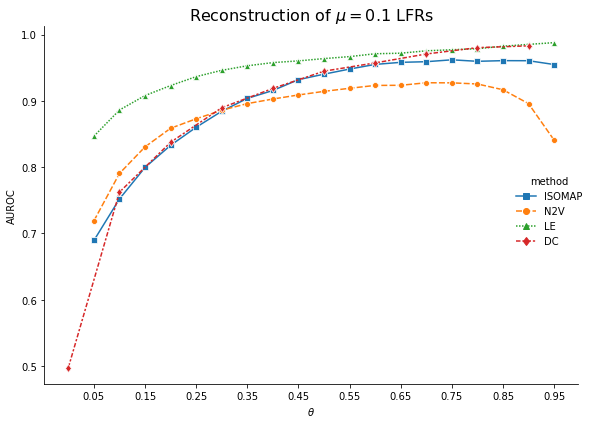

In [6]:
# Instantiate figure, subset relevant data
plt.figure()
df_ = df.query("performance_measurement == 'auroc'")

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="performance_value",
    hue="method",
    style="method", markers=["s", "o", "^", "d"],
    height=6, aspect=1.2
)

# Axes configuration
plt.xlabel(r"$\theta$")
plt.ylabel("AUROC")
plt.xticks(THETAS[::2])

# Figure-level attributes
plt.title(r"Reconstruction of $\mu=0.1$ LFRs")


# Save plot
plt.tight_layout()
plt.savefig(
    "figure_EMB_exSYSLFR_kind-scatter_data-auroc-theta_by-method-normalized_input-LFR-manuscript.png",
    facecolor="white",
    transparent=False
)